In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import src.features.build_features as build_features
from sklearn.metrics import precision_recall_fscore_support

In [6]:
if os.path.split(os.getcwd())[-1] == 'notebooks': os.chdir(os.path.split(os.getcwd())[-2])
print(os.getcwd())

/home/fitzaudoen/apps/gas-sensor-analytics-demo


In [7]:
sns.set()
sns.set_context('talk')

Evaluate several classifcation models using an arbitrary cross validation set. Tune hyperparameters and plot learning curve. Compare the several algorithms.

Generally, all the algorithms perform well at identifying the gas. The expectation is that a high score (>99%)  would be possible given this is data from a scientific instrument. 

The support vector machine appears to be perform best. 

# Prepare data

In [4]:
df = pd.read_pickle('data/processed/train_data.pkl')

In [10]:
data = df.values
batch_id = data[:,0]
y = data[:,1]
X_raw = data[:,3:]
cols = df.columns.values

### Fit preprocess pipeline and transform features

In [58]:
pl_clf = build_features.preprocess_pipeline_clf()

In [12]:
X = pl_clf.fit_transform(X_raw)

### Preprocess cross validation data

In [13]:
cv_df = pd.read_pickle('data/processed/cv_data.pkl')

In [15]:
data_cv = cv_df.values
batch_id_cv = data_cv[:,0]
y_cv = data_cv[:,1]
X_cv_raw = data_cv[:,3:]
X_cv = pl_clf.transform(X_cv_raw)

# Models without Reduction

## Logistic Regression

In [16]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)
print(clf.score(X,y))

0.9960460100647016


In [17]:
# Score of cross validation set
print(clf.score(X_cv,y_cv))

0.9942487419122933


### Set regularization parameter

In [18]:
C_arr_lr = list(range(1,500,50))
scores_varC_lr = []
score_varC_lr_cv = []
for C in C_arr_lr :
    clf = LogisticRegression(random_state=0, max_iter=5000, C=C).fit(X, y)
    scores_varC_lr.append(clf.score(X,y))
    score_varC_lr_cv.append(clf.score(X_cv,y_cv))

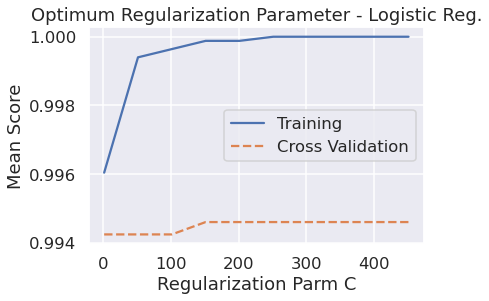

In [19]:
fig, ax = plt.subplots()
ax.plot(C_arr_lr,scores_varC_lr,label='Training')
ax.plot(C_arr_lr,score_varC_lr_cv,'--',label='Cross Validation')
ax.set_xlabel("Regularization Parm C")
ax.set_ylabel('Mean Score')
ax.set_title('Optimum Regularization Parameter - Logistic Reg.')
ax.legend()

# Learning Curve

In [55]:
n_arr_lr = list(range(50,250,25)) + list(range(250,len(X),500))
scores_learn_lr = []
scores_learn_lr_cv = []
for n in n_arr_lr:
    clf = LogisticRegression(random_state=0, max_iter=5000, C=125).fit(X[0:n,:], y[0:n])
    scores_learn_lr.append(clf.score(X[0:n,:],y[0:n]))
    scores_learn_lr_cv.append(clf.score(X_cv,y_cv))

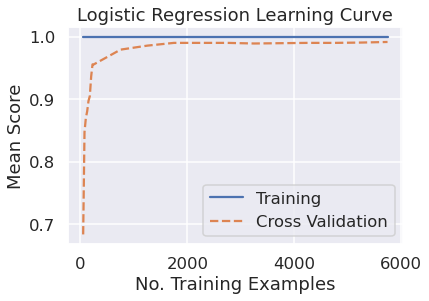

In [56]:
fig, ax = plt.subplots()
ax.plot(n_arr_lr,scores_learn_lr,label='Training')
ax.plot(n_arr_lr,scores_learn_lr_cv,'--',label='Cross Validation')
ax.set_title('Logistic Regression Learning Curve')
ax.set_xlabel('No. Training Examples')
ax.set_ylabel('Mean Score')
ax.legend()

In [57]:
clf =  LogisticRegression(random_state=0, max_iter=5000, C=125)
%timeit clf.fit(X, y)

10.7 s ± 574 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Support Vector Classification

In [39]:
clf_svc = SVC(C=50)

In [40]:
clf_svc.fit(X,y)

SVC(C=50)

In [41]:
clf_svc.score(X,y)

0.9992810927390366

In [42]:
clf_svc.score(X_cv,y_cv)

0.9974838245866283

In [24]:
C_arr_svm = list(range(1,500,50))
score_arr_svm = []
score_arr_svm_cv = []
for C in C_arr_svm:
    clf = SVC(C=C)
    clf = clf.fit(X, y)
    score_arr_svm.append(clf.score(X,y))
    score_arr_svm_cv.append(clf.score(X_cv,y_cv))


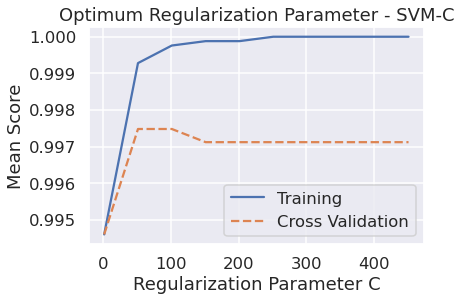

In [25]:
fig, ax = plt.subplots()
ax.plot(C_arr_svm,score_arr_svm, label='Training')
ax.plot(C_arr_svm,score_arr_svm_cv, '--',label='Cross Validation')
ax.set_xlabel('Regularization Parameter C')
ax.set_ylabel('Mean Score')
ax.set_title('Optimum Regularization Parameter - SVM-C')
ax.legend()

In [26]:
n_arr_svm = list(range(50,250,25)) + list(range(250,len(X),500))
score_arr_learn_svm = []
score_arr_learn_svm_cv = []
for n in n_arr_svm:
    clf = SVC(C=C)
    clf = clf.fit(X[0:n,:], y[0:n])
    score_arr_learn_svm.append(clf.score(X[0:n,:],y[0:n]))
    score_arr_learn_svm_cv.append(clf.score(X_cv,y_cv))

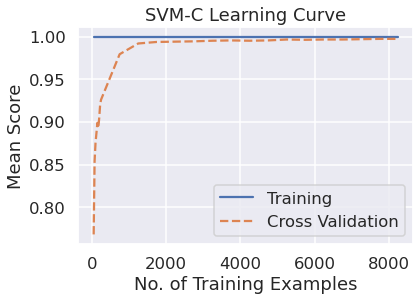

In [27]:
fig, ax = plt.subplots()
ax.plot(n_arr_svm,score_arr_learn_svm, label='Training')
ax.plot(n_arr_svm,score_arr_learn_svm_cv,'--',label='Cross Validation')
ax.set_xlabel('No. of Training Examples')
ax.set_ylabel('Mean Score')
ax.set_title('SVM-C Learning Curve')
ax.legend()

In [28]:
clf = SVC(C=400)
x = %timeit clf.fit(X,y)

1.28 s ± 74.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
print(x)

None


### Random Forest Classification

In [30]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=20, random_state=0)

In [31]:
clf.score(X,y)

1.0

In [32]:
clf.score(X_cv,y_cv)

0.9953271028037384

In [33]:
list(range(2,20,2))

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [34]:
n_arr_rf = [10,50,100,150,200]
score_arr_rf = []
score_arr_rf_cv = []
for n in n_arr_rf:
    clf = RandomForestClassifier(max_depth=20, random_state=0, n_estimators=n)
    clf = clf.fit(X, y)
    score_arr_rf.append(clf.score(X,y))
    score_arr_rf_cv.append(clf.score(X_cv,y_cv))

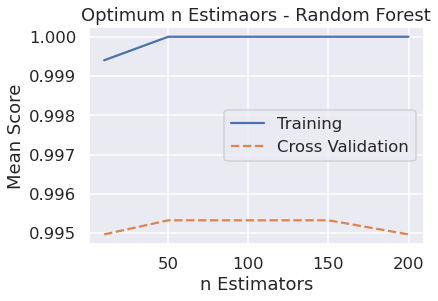

In [35]:
fig, ax = plt.subplots()
ax.plot(n_arr_rf,score_arr_rf, label='Training')
ax.plot(n_arr_rf,score_arr_rf_cv, '--',label='Cross Validation')
ax.set_xlabel('n Estimators')
ax.set_ylabel('Mean Score')
ax.set_title('Optimum n Estimaors - Random Forest')
ax.legend()

In [36]:
n_arr_rf = list(range(50,250,25)) + list(range(250,len(X),500))
score_arr_learn_rf = []
score_arr_learn_rf_cv = []
for n in n_arr_rf:
    clf = RandomForestClassifier(max_depth=20, random_state=0)
    clf = clf.fit(X[0:n,:], y[0:n])
    score_arr_learn_rf.append(clf.score(X[0:n,:],y[0:n]))
    score_arr_learn_rf_cv.append(clf.score(X_cv,y_cv))

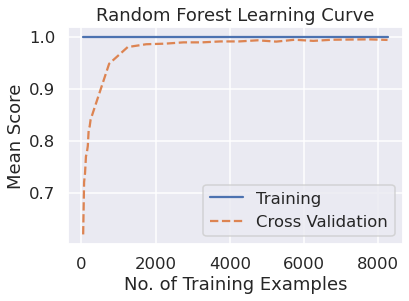

In [37]:
fig, ax = plt.subplots()
ax.plot(n_arr_rf,score_arr_learn_rf, label='Training')
ax.plot(n_arr_rf,score_arr_learn_rf_cv,'--',label='Cross Validation')
ax.set_xlabel('No. of Training Examples')
ax.set_ylabel('Mean Score')
ax.set_title('Random Forest Learning Curve')
ax.legend()

In [76]:
clf = RandomForestClassifier(max_depth=12, random_state=0)
%timeit clf.fit(X,y)

3.02 s ± 49.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Does Changing Parameter Allow less Training Examples?
Since training is ~100% for depth > 12, then can just plot validation curves at different depths and see if it changes

In [77]:
n_arr_rf = list(range(50,250,25)) + list(range(250,len(X),500))
score_arr_learn_rf = []
score_arr_learn_rf_cv = []
for n in n_arr_rf:
    clf = RandomForestClassifier(max_depth=50, random_state=0)
    clf = clf.fit(X[0:n,:], y[0:n])
    score_arr_learn_rf.append(clf.score(X[0:n,:],y[0:n]))
    score_arr_learn_rf_cv.append(clf.score(X_cv,y_cv))

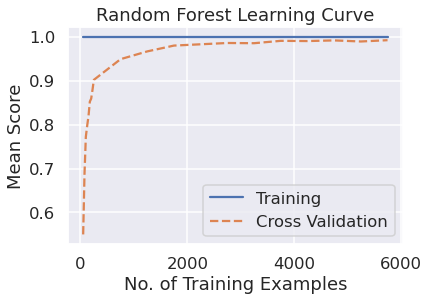

In [78]:
fig, ax = plt.subplots()
ax.plot(n_arr_rf,score_arr_learn_rf, label='Training')
ax.plot(n_arr_rf,score_arr_learn_rf_cv,'--',label='Cross Validation')
ax.set_xlabel('No. of Training Examples')
ax.set_ylabel('Mean Score')
ax.set_title('Random Forest Learning Curve')
ax.legend()

# Comparison Plot

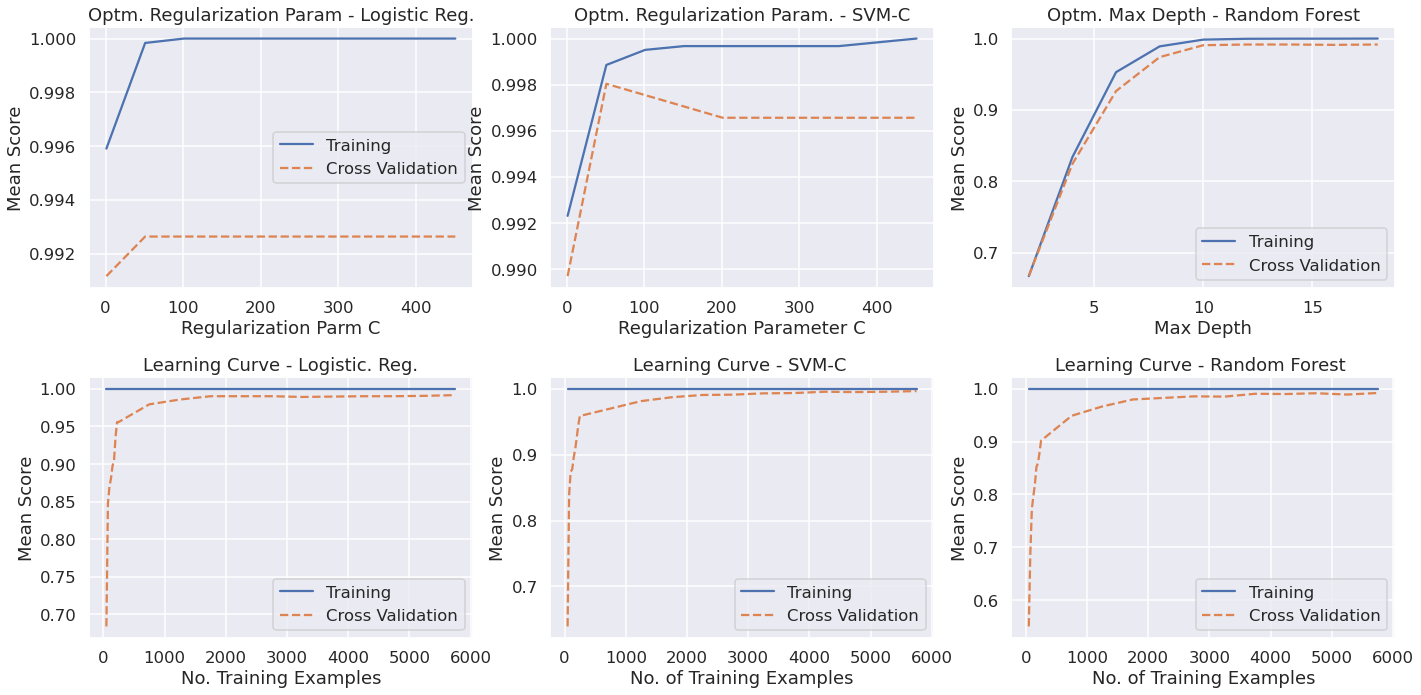

In [79]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

# Logistic Regressionn 
## Set Parameter
ax[0,0].plot(C_arr_lr,scores_varC_lr,label='Training')
ax[0,0].plot(C_arr_lr,score_varC_lr_cv,'--',label='Cross Validation')
ax[0,0].set_xlabel("Regularization Parm C")
ax[0,0].set_ylabel('Mean Score')
ax[0,0].set_title('Optm. Regularization Param - Logistic Reg.')
ax[0,0].legend()
## Learning Curve
ax[1,0].plot(n_arr_lr,scores_learn_lr,label='Training')
ax[1,0].plot(n_arr_lr,scores_learn_lr_cv,'--',label='Cross Validation')
ax[1,0].set_title('Learning Curve - Logistic. Reg.')
ax[1,0].set_xlabel('No. Training Examples')
ax[1,0].set_ylabel('Mean Score')
ax[1,0].legend()
plt.tight_layout()

# SVM-C
## Regularization Parameter
ax[0,1].plot(C_arr_svm,score_arr_svm, label='Training')
ax[0,1].plot(C_arr_svm,score_arr_svm_cv, '--',label='Cross Validation')
ax[0,1].set_xlabel('Regularization Parameter C')
ax[0,1].set_ylabel('Mean Score')
ax[0,1].set_title('Optm. Regularization Param. - SVM-C')

## Learning Curve
ax[1,1].plot(n_arr_svm,score_arr_learn_svm, label='Training')
ax[1,1].plot(n_arr_svm,score_arr_learn_svm_cv,'--',label='Cross Validation')
ax[1,1].set_xlabel('No. of Training Examples')
ax[1,1].set_ylabel('Mean Score')
ax[1,1].set_title('Learning Curve - SVM-C ')
ax[1,1].legend()

# Random Forest Classification
## Max Depth
ax[0,2].plot(depth_arr_rf,score_arr_rf, label='Training')
ax[0,2].plot(depth_arr_rf,score_arr_rf_cv, '--',label='Cross Validation')
ax[0,2].set_xlabel('Max Depth')
ax[0,2].set_ylabel('Mean Score')
ax[0,2].set_title('Optm. Max Depth - Random Forest')
ax[0,2].legend()

## Learning Curve
ax[1,2].plot(n_arr_rf,score_arr_learn_rf, label='Training')
ax[1,2].plot(n_arr_rf,score_arr_learn_rf_cv,'--',label='Cross Validation')
ax[1,2].set_xlabel('No. of Training Examples')
ax[1,2].set_ylabel('Mean Score')
ax[1,2].set_title('Learning Curve - Random Forest ')
ax[1,2].legend()

# Score details on SVC

In [46]:
y_pred_svc_cv = clf_svc.predict(X_cv)

In [47]:
precision_recall_fscore_support(y_cv, y_pred_svc_cv)

(array([0.9973262 , 0.99311532, 1.        , 0.99809524, 0.99830221,
        1.        ]),
 array([1.        , 1.        , 0.9847561 , 0.99809524, 0.99830221,
        1.        ]),
 array([0.99866131, 0.99654577, 0.99231951, 0.99809524, 0.99830221,
        1.        ]),
 array([373, 577, 328, 525, 589, 390]))

In [49]:
y_pred_svc_cv

array(['Ammonia', 'Toluene', 'Acetaldehyde', ..., 'Toluene', 'Acetone',
       'Toluene'], dtype=object)

In [50]:
y_cv

array(['Ammonia', 'Toluene', 'Acetaldehyde', ..., 'Toluene', 'Acetone',
       'Toluene'], dtype=object)

In [52]:
y_cv[y_cv!=y_pred_svc_cv]

array(['Ammonia', 'Ethylene', 'Ammonia', 'Ethanol', 'Ammonia', 'Ammonia',
       'Ammonia'], dtype=object)

# Add model to pipeline

In [61]:
pl_clf = build_features.preprocess_pipeline_clf()

In [63]:
pl_clf.steps.append(('class', SVC(C=50)))

In [65]:
pl_clf.fit(X, y)

Pipeline(steps=[('scale', PowerTransformer()), ('filter', filterUnusualX()),
                ('impute', KNNImputer()), ('class', SVC(C=50))])

In [66]:
pl_clf.score(X_cv, y_cv)

0.9974838245866283